## Модели классификации для нескольких классов

Ирисы Фишера - самый популярный в статистической литературе набор данных, часто используемый для иллюстрации работы различных алгоритмов классификации.

Выборка состоит из 150 экземпляров ирисов трех видов, для которых измерялись четыре характеристики: длина и ширина чашелистика (Sepal.Length и Sepal.Width), длина и ширина лепестка (Petal.Length и Petal.Width). Требуется на основе этого набора данных, построить различные модели многоклассовой классификации, оценивающие каждый из трех видов растения по данным проведенных измерений.

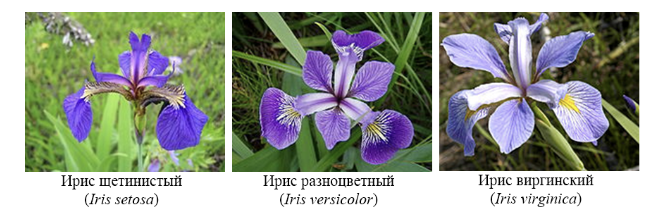

Импортируем необходимые библиотеки:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Библиотека Scikit-Learn предоставляет чистые датасеты, которые вы можете использовать при построении моделей машинного обучения. Они поставляются вместе с Scikit-Learn (https://scikit-learn.ru/7-1-toy-datasets/).

Набор данных Iris, классический набор данных в машинном обучении и статистике. Он входит в модуль datasets библиотеки scikit-learn и загрузить его можно, вызвав функцию load_iris().

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [14]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Набор данных состоит из длины/ширины двух типов лепестков Ириса: sepal и petal.

Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica. 

Соответственно, наша задача — по имеющимся данным попробовать найти зависимости между размерами лепестков и сортами Ирисов.

In [16]:
type(iris)

sklearn.utils._bunch.Bunch

Объект Bunch — это словарь, который предоставляет свои ключи как атрибуты.

Формируем DataFrame:

In [20]:
iris_df = pd.DataFrame(iris.data)

In [22]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
# Делаем имена колонок такие же, как имена переменных:
iris_df.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_df['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [26]:
iris_df.shape

(150, 6)

In [28]:
# информация о наборе данных
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   name               150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [30]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [32]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [34]:
iris_df['name'].value_counts()

name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Описательная статистика

In [37]:
iris_df.hist(figsize = (15,10), bins = 50);

In [39]:
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

Видно, что «petal width (cm)» и «petal length (cm)» имеют сильную зависимость — точки вытянуты вдоль одной линии. И в принципе по этим же признакам можно строить классификацию, т.к. точки по цвету сгруппированы достаточно компактно. А вот, например, с помощью переменных «sepal width (cm)» и «sepal length (cm)» качественную классификацию не построить, т.к. точки, относящиеся к сортам Versicolor и Virginica, перемешаны между собой.

In [41]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="name")

<Axes: xlabel='petal width (cm)', ylabel='Density'>

In [44]:
corr = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [46]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

<Axes: >

Действительно видим, что между переменными «petal length (cm)» и «petal width (cm)» выявлена очень сильная зависимость 0.96, а между «sepal width (cm)» и «sepal length (cm)» - слабая корреляция.

### Модель KNN

KNN Accuracy: 0.93
KNN Precision: 0.93
KNN Recall: 0.93
KNN F1 Score: 0.93


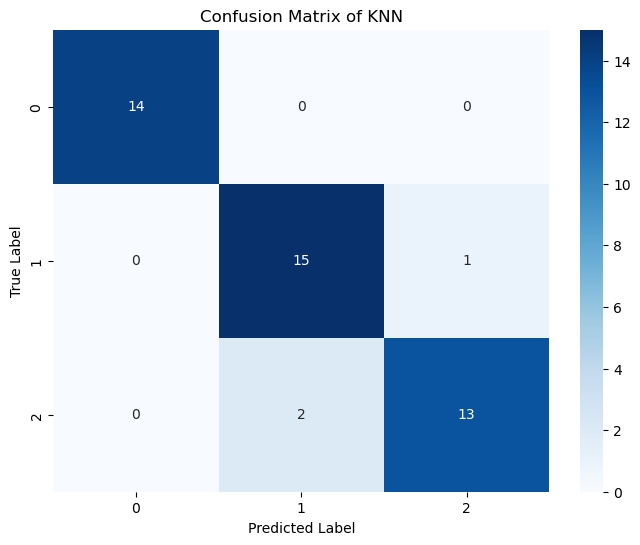

In [86]:

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], 
    iris_df['target'], 
    test_size=0.3, 
    random_state=19
)

# Обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Прогнозирование
y_pred_knn = knn.predict(X_test)

# Оценка производительности
knn_ac = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')

# Вывод метрик
print(f'KNN Accuracy: {knn_ac:.2f}')
print(f'KNN Precision: {knn_precision:.2f}')
print(f'KNN Recall: {knn_recall:.2f}')
print(f'KNN F1 Score: {knn_f1:.2f}')

# Построение confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()


# Модель Логистической Регрессии

Logistic Regression Accuracy: 0.93
Logistic Regression Precision: 0.94
Logistic Regression Recall: 0.93
Logistic Regression F1 Score: 0.93


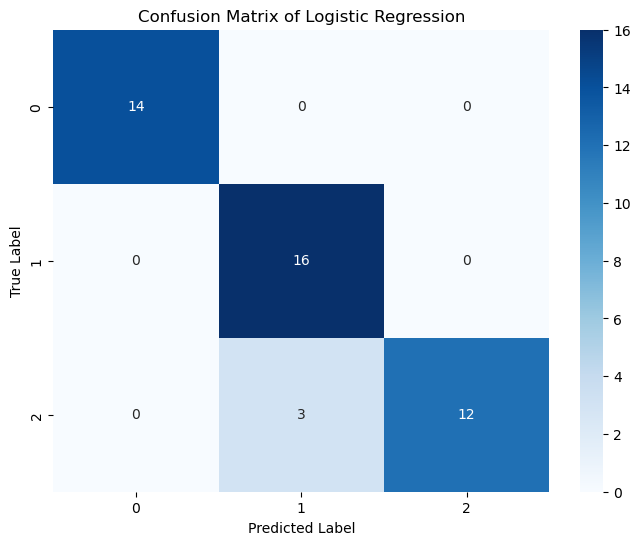

In [106]:
from sklearn.linear_model import LogisticRegression

# Обучение модели логистической регрессии
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Прогнозирование
y_pred_log_reg = log_reg.predict(X_test)

# Оценка производительности
lr_ac = accuracy_score(y_test, y_pred_log_reg)
lr_precision = precision_score(y_test, y_pred_log_reg, average='weighted')
lr_recall = recall_score(y_test, y_pred_log_reg, average='weighted')
lr_f1 = f1_score(y_test, y_pred_log_reg, average='weighted')

# Вывод метрик
print(f'Logistic Regression Accuracy: {lr_ac:.2f}')
print(f'Logistic Regression Precision: {lr_precision:.2f}')
print(f'Logistic Regression Recall: {lr_recall:.2f}')
print(f'Logistic Regression F1 Score: {lr_f1:.2f}')

# Построение confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()


# Модель Случайного Леса

Random Forest Accuracy: 0.96
Random Forest Precision: 0.96
Random Forest Recall: 0.96
Random Forest F1 Score: 0.96


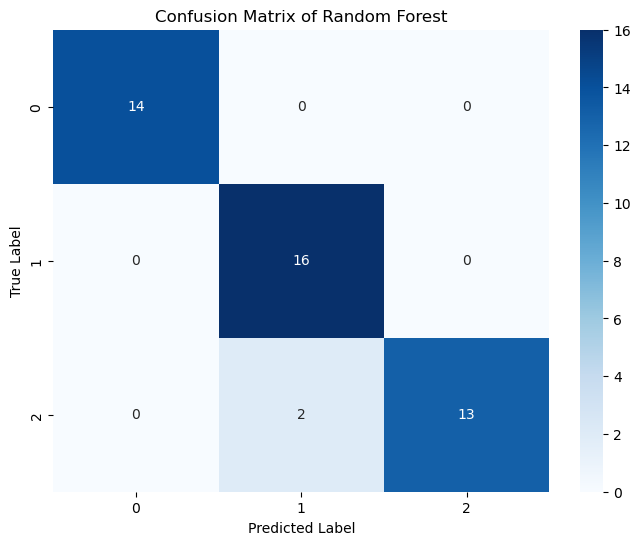

In [109]:
from sklearn.ensemble import RandomForestClassifier

# Обучение модели случайного леса
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Прогнозирование
y_pred_rf = rf.predict(X_test)

# Оценка производительности
accuracy_rf = accuracy_score(y_test, y_pred_rf)
rfc_precision = precision_score(y_test, y_pred_rf, average='weighted')
rfc_recall = recall_score(y_test, y_pred_rf, average='weighted')
rfc_f1 = f1_score(y_test, y_pred_rf, average='weighted')

# Вывод метрик
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest Precision: {rfc_precision:.2f}')
print(f'Random Forest Recall: {rfc_recall:.2f}')
print(f'Random Forest F1 Score: {rfc_f1:.2f}')

# Построение confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Random Forest')
plt.show()



### Модель Gaussian Naive Bayes

Gaussian Naive Bayes Accuracy: 0.93
Gaussian Naive Bayes Precision: 0.94
Gaussian Naive Bayes Recall: 0.93
Gaussian Naive Bayes F1 Score: 0.93


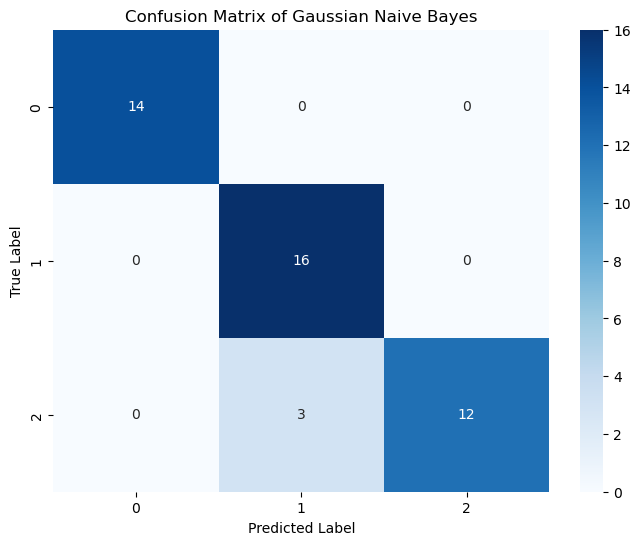

In [112]:
from sklearn.naive_bayes import GaussianNB

# Обучение модели Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Прогнозирование
y_pred_gnb = gnb.predict(X_test)

# Оценка производительности
gnb_ac = accuracy_score(y_test, y_pred_gnb)
gnb_precision = precision_score(y_test, y_pred_gnb, average='weighted')
gnb_recall = recall_score(y_test, y_pred_gnb, average='weighted')
gnb_f1 = f1_score(y_test, y_pred_gnb, average='weighted')

# Вывод метрик
print(f'Gaussian Naive Bayes Accuracy: {gnb_ac:.2f}')
print(f'Gaussian Naive Bayes Precision: {gnb_precision:.2f}')
print(f'Gaussian Naive Bayes Recall: {gnb_recall:.2f}')
print(f'Gaussian Naive Bayes F1 Score: {gnb_f1:.2f}')

# Построение confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Gaussian Naive Bayes')
plt.show()


# Вывод
Если все три модели (KNN, логистическая регрессия и случайный лес) показывают одинаковую точность (Accuracy),
это может сигнализировать о нескольких моментах:
### 1. Высокая однородность данных
Если данные имеют структуру, в которой каждую точку можно хорошо классифицировать без сложных зависимостей,
модели могут достичь схожих результатов. Например, в наборе данных Ирисов могут быть четкие границы между классами.
### 2. Простота задач
Если задача не слишком сложная или не имеет схожих классов, разные алгоритмы могут находить одно и то же решение. 
Например, в случае базовых задач агрегации, таких как классификация Ирисов, простые алгоритмы могут так же хорошо выполнять работу,
как и более сложные.

In [118]:
classifiers = ["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]
log_cols = ["Classifier", "Accuracy", "Precision", "Recall", "F1"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_ac, gnb_ac, accuracy_rf, lr_ac]
log["Precision"] = [knn_precision, gnb_precision, rfc_precision, lr_precision]
log["Recall"] = [knn_recall, gnb_recall, rfc_recall, lr_recall]
log["F1"] = [knn_f1, gnb_f1, rfc_f1, lr_f1]

# Вывод результатов
print(log)



                 Classifier  Accuracy  Precision    Recall        F1
0      KNeighborsClassifier  0.933333   0.934360  0.933333  0.933194
1      Gaussian Naive Bayes  0.933333   0.943860  0.933333  0.932487
2  Random Forest Classifier  0.955556   0.960494  0.955556  0.955275
3       Logistic Regression  0.933333   0.943860  0.933333  0.932487


### Метрики многоклассовой классификации

1) Микро-усреднение (micro-averaging) является эквивалентом accuracy и подходит __при сбалансированных классах__. Элементы consufion matrix усредняются между бинарными прогнозами для каждого класса, после чего метрики рассчитываются на полученной матрице. На примере Precision и Recall это выглядит следующим образом:

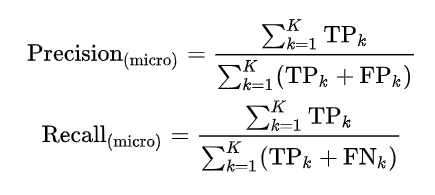

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [86]:
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))

0.9333333333333333
0.9333333333333333
0.9333333333333333


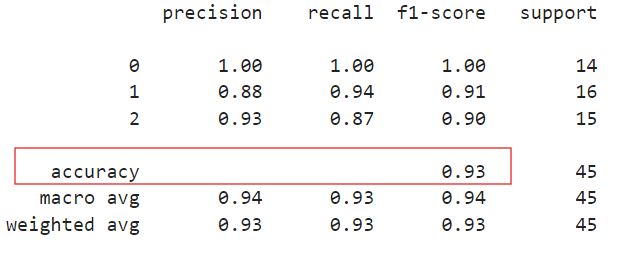

2) Макро-усреднение (macro-averaging) представляет собой среднее арифметическое подсчитанной метрики для каждого класса и используется __при дисбалансе классов, когда важен каждый класс__. В таком случае все классы учитываются равномерно независимо от их размера.

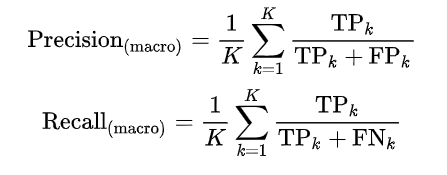

In [91]:
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.9369747899159663
0.9347222222222222
0.9352142110762801


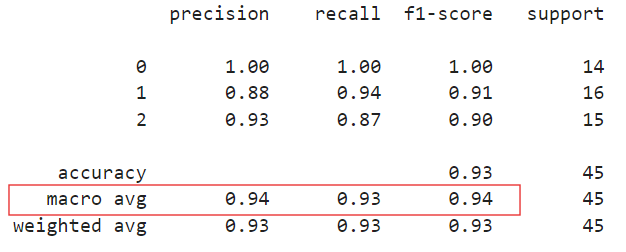

3) Взвешенное усреднение (weighted averaging) рассчитывается как взвешенное среднее и также применяется в случае __дисбаланса классов__, но только когда важность класса учитывается в зависимости от количества объектов с таким классом, то есть __когда важны наибольшие классы__. При таком подходе важность каждого класса учитывается с присвоением им весов. Вес класса w_k может устанавливаться по-разному, например, как доля примеров этого класса в обучающей выборке:

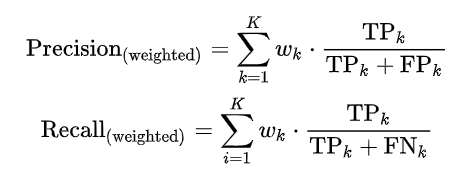

In [86]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.9343604108309991
0.9333333333333333
0.9331940090560781


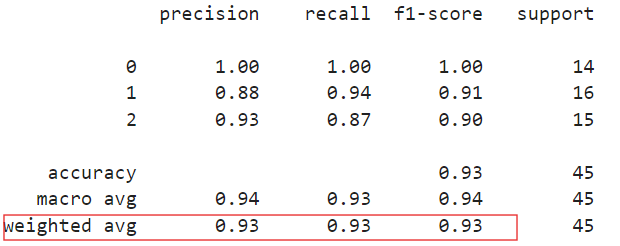

### Кроссвалидация

In [89]:
X = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] 
                                                    

In [91]:
y = iris_df['target']

In [93]:
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve

In [95]:
# Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)
print('Cross-validation scores: ', cv_scores)
print('Mean cross-validation score: ', np.mean(cv_scores))

Cross-validation scores:  [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean cross-validation score:  0.96


### Настройка гиперпараметров

In [97]:
# Hyperparameter tuning
param_grid = {'n_neighbors': [1,2,3,4,5]}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_neighbors': 3}


In [99]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [101]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.94      0.91        16
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



In [105]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [107]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

